In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
file = 'E:\LOGS\AR_Wing-2021-01-29.csv'
data = pd.read_csv(file, sep=',')#, parse_dates=[0,1] , infer_datetime_format=True)
data[['GPS(lat)', 'GPS(lon)']] = data['GPS'].str.split(' ', 1, expand=True)

In [3]:
seconds = pd.to_datetime(data['Time']).astype('int64')//1e9

In [4]:
threshold = 10*60 # 10 minutes de différences entre 2 vols distincts
new_flight_pos = np.where(np.diff(seconds) > threshold)[0]

In [5]:
if new_flight_pos.size > 0:
    flights = []
    flights.append(data[0:new_flight_pos[0]-1])
    for i in range(len(new_flight_pos)-1):
        flights.append(data[new_flight_pos[i]:new_flight_pos[i+1]-1])
    flights.append(data[new_flight_pos[-1]:])
else:
    flights = [data]

In [8]:
for i,f in enumerate(flights):
    f.to_csv(os.path.basename(file[:-4])+'_'+str(i)+'.csv', index=False, sep=";")

In [9]:
data.columns

Index(['Date', 'Time', 'BtRx(V)', 'RSSI(dB)', 'AccZ(g)', 'Tmp1(@C)', 'A4(V)',
       'VFAS(V)', 'Curr(A)', 'Alt(m)', 'Fuel(%)', 'VSpd(m/s)', 'Hdg(@)',
       'AccX(g)', 'AccY(g)', '0450', 'Tmp2(@C)', 'Dist(m)', 'GAlt(m)',
       'GSpd(kmh)', 'GPS', 'ASpd(kmh)', 'Alt(m).1', 'Dir', 'Prf', 'Gaz', 'Ail',
       'S1', 'S2', 'SA', 'SB', 'SC', 'SD', 'LSW', 'TxBat(V)', 'GPS(lat)',
       'GPS(lon)'],
      dtype='object')

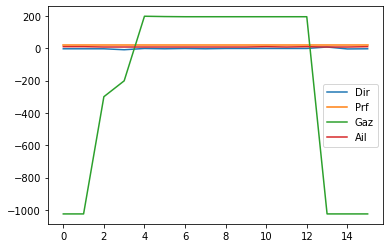

In [25]:
plt.plot(data['Dir'], label='Dir')
plt.plot(data['Prf'], label='Prf')
plt.plot(data['Gaz'], label='Gaz')
plt.plot(data['Ail'], label='Ail')
plt.legend()

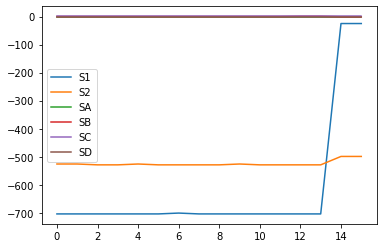

In [26]:
plt.plot(data['S1'], label='S1')
plt.plot(data['S2'], label='S2')
plt.plot(data['SA'], label='SA')
plt.plot(data['SB'], label='SB')
plt.plot(data['SC'], label='SC')
plt.plot(data['SD'], label='SD')
plt.legend()